In [1]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
datadir = 'pavledata'

#filename='test1.h5'
#filename='MLData_20200520_1.h5'  # problematic - scale seems off
#filename='MLData_20200527_1.h5'
#filename='MLData_20200603_1.h5'
filename='MLData_20200608_1.h5'

# hdf5 data set loading

In [3]:
f = h5py.File(os.path.join(datadir,filename),'r')

In [4]:
f.items()

ItemsViewHDF5(<HDF5 file "MLData_20200608_1.h5" (mode r)>)

In [5]:
f.keys()

<KeysViewHDF5 ['SARFE10-PBIG050-EVR0:CALCI', 'SARFE10-PBIG050-EVR0:CALCS', 'SARFE10-PBIG050-EVR0:CALCT', 'SARFE10-PBPG050:FELPHOTENE', 'SARFE10-PBPG050:HAMP-HV-DS', 'SARFE10-PBPG050:HAMP-HV-US', 'SARFE10-PBPG050:MKS-PRESSURE', 'SARFE10-PBPG050:PHOTON-ENERGY-PER-PULSE-AVG', 'pulse_id']>

In [6]:
list(f['SARFE10-PBIG050-EVR0:CALCI'])

['data', 'pulse_id', 'timestamp', 'timestamp_offset']

In [7]:
#list(f['SARFE10-PBIG050-EVR0:CALCI']['pulse_id'])

In [8]:
calci = f.get('SARFE10-PBIG050-EVR0:CALCI')
calci

<HDF5 group "/SARFE10-PBIG050-EVR0:CALCI" (4 members)>

In [9]:
calci = np.array(f.get('SARFE10-PBIG050-EVR0:CALCI'))
calci.shape

(4,)

In [10]:
calci

array(['data', 'pulse_id', 'timestamp', 'timestamp_offset'], dtype='<U16')

In [11]:
f.keys()

<KeysViewHDF5 ['SARFE10-PBIG050-EVR0:CALCI', 'SARFE10-PBIG050-EVR0:CALCS', 'SARFE10-PBIG050-EVR0:CALCT', 'SARFE10-PBPG050:FELPHOTENE', 'SARFE10-PBPG050:HAMP-HV-DS', 'SARFE10-PBPG050:HAMP-HV-US', 'SARFE10-PBPG050:MKS-PRESSURE', 'SARFE10-PBPG050:PHOTON-ENERGY-PER-PULSE-AVG', 'pulse_id']>

In [12]:
list(f)

['SARFE10-PBIG050-EVR0:CALCI',
 'SARFE10-PBIG050-EVR0:CALCS',
 'SARFE10-PBIG050-EVR0:CALCT',
 'SARFE10-PBPG050:FELPHOTENE',
 'SARFE10-PBPG050:HAMP-HV-DS',
 'SARFE10-PBPG050:HAMP-HV-US',
 'SARFE10-PBPG050:MKS-PRESSURE',
 'SARFE10-PBPG050:PHOTON-ENERGY-PER-PULSE-AVG',
 'pulse_id']

In [13]:
varmap = { 'SARFE10-PBIG050-EVR0:CALCI': 'CALCI',
 'SARFE10-PBIG050-EVR0:CALCS': 'CALCS',
 'SARFE10-PBIG050-EVR0:CALCT': 'CALCT',
 'SARFE10-PBPG050:FELPHOTENE': 'Ephot',
 'SARFE10-PBPG050:HAMP-HV-DS': 'Voltage_t',
 'SARFE10-PBPG050:HAMP-HV-US': 'Voltage_s',
 'SARFE10-PBPG050:MKS-PRESSURE': 'pressure',
 'SARFE10-PBPG050:PHOTON-ENERGY-PER-PULSE-AVG': 'PEPavg',
         'pulse_id': 'pulse_id'}

In [14]:
f.get('SARFE10-PBIG050-EVR0:CALCI').keys()

<KeysViewHDF5 ['data', 'pulse_id', 'timestamp', 'timestamp_offset']>

In [15]:
for item in f.get('SARFE10-PBIG050-EVR0:CALCI').items():
    print(item)

('data', <HDF5 dataset "data": shape (100000,), type "<f8">)
('pulse_id', <HDF5 dataset "pulse_id": shape (100000,), type "<i8">)
('timestamp', <HDF5 dataset "timestamp": shape (100000,), type "<i8">)
('timestamp_offset', <HDF5 dataset "timestamp_offset": shape (100000,), type "<i8">)


In [16]:
test = f.get('SARFE10-PBIG050-EVR0:CALCI/data')

In [17]:
test

<HDF5 dataset "data": shape (100000,), type "<f8">

In [18]:
data = f.get('SARFE10-PBPG050:HAMP-HV-DS/data')

In [19]:
# this results in a complete numpy ndarray
data[()]

array([    0.  , -1421.9 ,     0.  , ..., -1421.86,     0.  , -1421.86])

In [20]:
df = pd.DataFrame()
for grp in f.keys():
    if grp == 'pulse_id':
        continue
    print(f.get(grp).keys())
    df[grp] = f.get(grp + '/data')[()]
    print('    ', grp, f.get(grp + '/data'))

<KeysViewHDF5 ['data', 'pulse_id', 'timestamp', 'timestamp_offset']>
     SARFE10-PBIG050-EVR0:CALCI <HDF5 dataset "data": shape (100000,), type "<f8">
<KeysViewHDF5 ['data', 'pulse_id', 'timestamp', 'timestamp_offset']>
     SARFE10-PBIG050-EVR0:CALCS <HDF5 dataset "data": shape (100000,), type "<f8">
<KeysViewHDF5 ['data', 'pulse_id', 'timestamp', 'timestamp_offset']>
     SARFE10-PBIG050-EVR0:CALCT <HDF5 dataset "data": shape (100000,), type "<f8">
<KeysViewHDF5 ['data', 'pulse_id', 'timestamp', 'timestamp_offset']>
     SARFE10-PBPG050:FELPHOTENE <HDF5 dataset "data": shape (100000,), type "<f8">
<KeysViewHDF5 ['data', 'pulse_id', 'timestamp', 'timestamp_offset']>
     SARFE10-PBPG050:HAMP-HV-DS <HDF5 dataset "data": shape (100000,), type "<f8">
<KeysViewHDF5 ['data', 'pulse_id', 'timestamp', 'timestamp_offset']>
     SARFE10-PBPG050:HAMP-HV-US <HDF5 dataset "data": shape (100000,), type "<f8">
<KeysViewHDF5 ['data', 'pulse_id', 'timestamp', 'timestamp_offset']>
     SARFE10-PBPG05

In [21]:
df = df.rename(columns = varmap)

# a look at the raw data

In [22]:
df.describe()

CALCI          CALCS          CALCT          Ephot  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean     2241.292320   -2212.723284   -2269.861355       4.000393   
std       185.227916     183.186651     187.537923       4.000333   
min         0.000000   -2612.543566   -2659.088429       0.000000   
25%      2142.731802   -2324.908259   -2384.816265       0.000000   
50%      2262.659235   -2233.433017   -2292.049543       7.999976   
75%      2354.635714   -2115.424661   -2170.009429       8.000626   
max      2627.878956       0.000000       0.000000       8.001325   

           Voltage_t      Voltage_s       pressure         PEPavg  
count  100000.000000  100000.000000  100000.000000  100000.000000  
mean     -710.996154    -735.890275       0.000086     198.913625  
std       710.985490     735.879237       0.000086     199.010794  
min     -1422.120000   -1471.870000       0.000000       0.000000  
25%     -1421.970000   -1471.750000       0.000000       0.000000  
50%     -1421.770000   -1471.610000       0.000167     378.640406  
75%         0.000000       0.000000       0.000171     397.783755  
max         0.000000       0.000000       0.000175     417.950804

Pavle:

    CALCI is, as you surmised, the average of the CALCS and CALCT.  The response is not in uJ -- it's just a number that we wish to get in uJ eventually.FELPHOTONENE is the photon energy (wavelength) of the FEL beam in eV.The -HV channels are voltages, as you surmised.  They are associated with CALCS and CALCT.  CALCS is with -HV-US, CALCT is with -HV-DS.


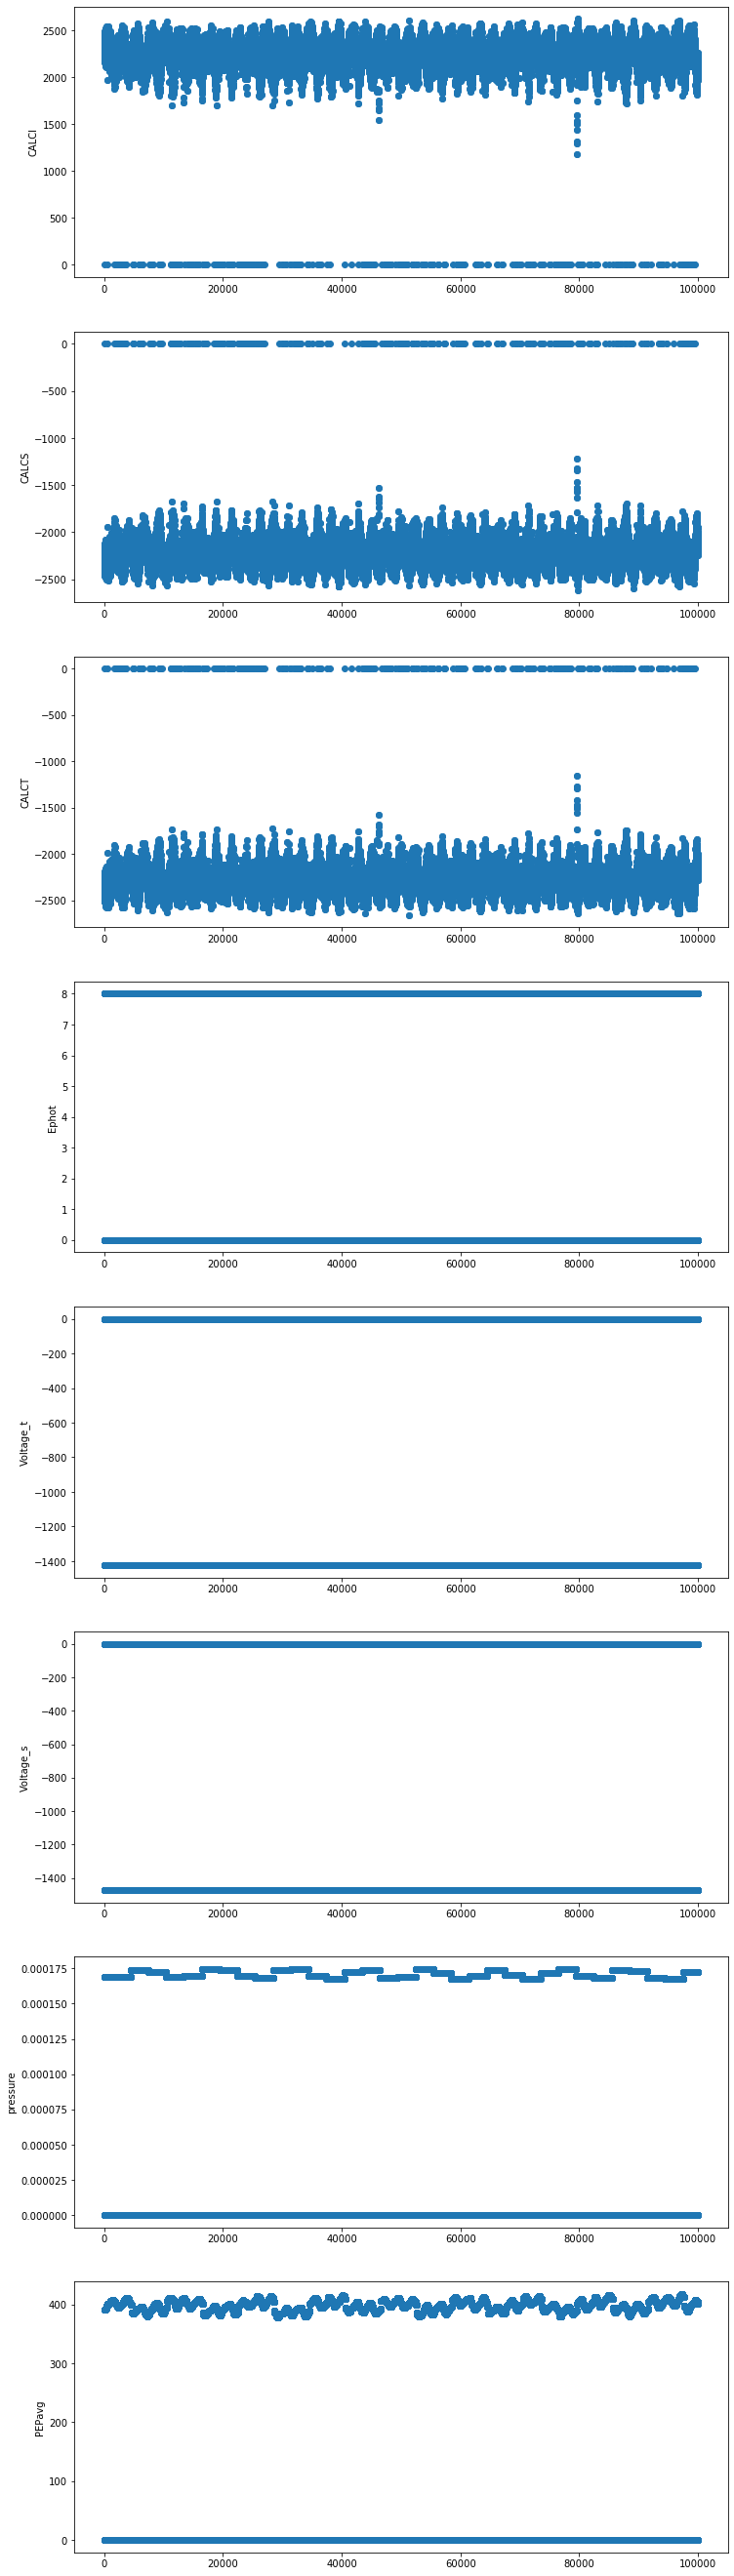

In [23]:
fig = plt.figure(figsize=(12, 6*len(df.columns)))
for idx,col in enumerate(df.columns, start=1):
    ax = fig.add_subplot(len(df.columns),1,idx)    
    ax.plot(df[col], linestyle='', marker='o')
    ax.set_ylabel(col)

# dataset cleaning

Set values which are undefined or below a threshold to NAN

In [24]:
(df.CALCS < -50.0).sum()

99702

In [25]:
for col in ['Ephot', 'Voltage_s', 'Voltage_t', 'PEPavg','pressure']:
    df.loc[df.loc[:,col] == 0.0, col] = np.nan

In [26]:
# Note: I do not use CALCI, and therefore I do not clean it
calc_thresh = -50.0
for col in ['CALCS', 'CALCT']:
    #df[col] = np.abs(df[col])
    df.loc[df.loc[:,col] > calc_thresh, col] = np.nan

In [27]:
df.isna().sum()

CALCI            0
CALCS          298
CALCT          298
Ephot        49999
Voltage_t    49999
Voltage_s    49999
pressure     49999
PEPavg       49999
dtype: int64

In [28]:
df.shape

(100000, 8)

In [29]:
# get rid of CALCS/CALCT below threshold
df = df[~(df.CALCS.isna() | df.CALCT.isna()) ]

df.isna().sum()

CALCI            0
CALCS            0
CALCT            0
Ephot        49999
Voltage_t    49999
Voltage_s    49999
pressure     49999
PEPavg       49999
dtype: int64

## transforms (units, neg->pos)

In [30]:
# we want to have Ephot in eV, not in keV
df.Ephot *= 1000

In [31]:
# in the original data sets I was given, the voltage was a positive number
df.Voltage_s = -df.Voltage_s
df.Voltage_t = -df.Voltage_t

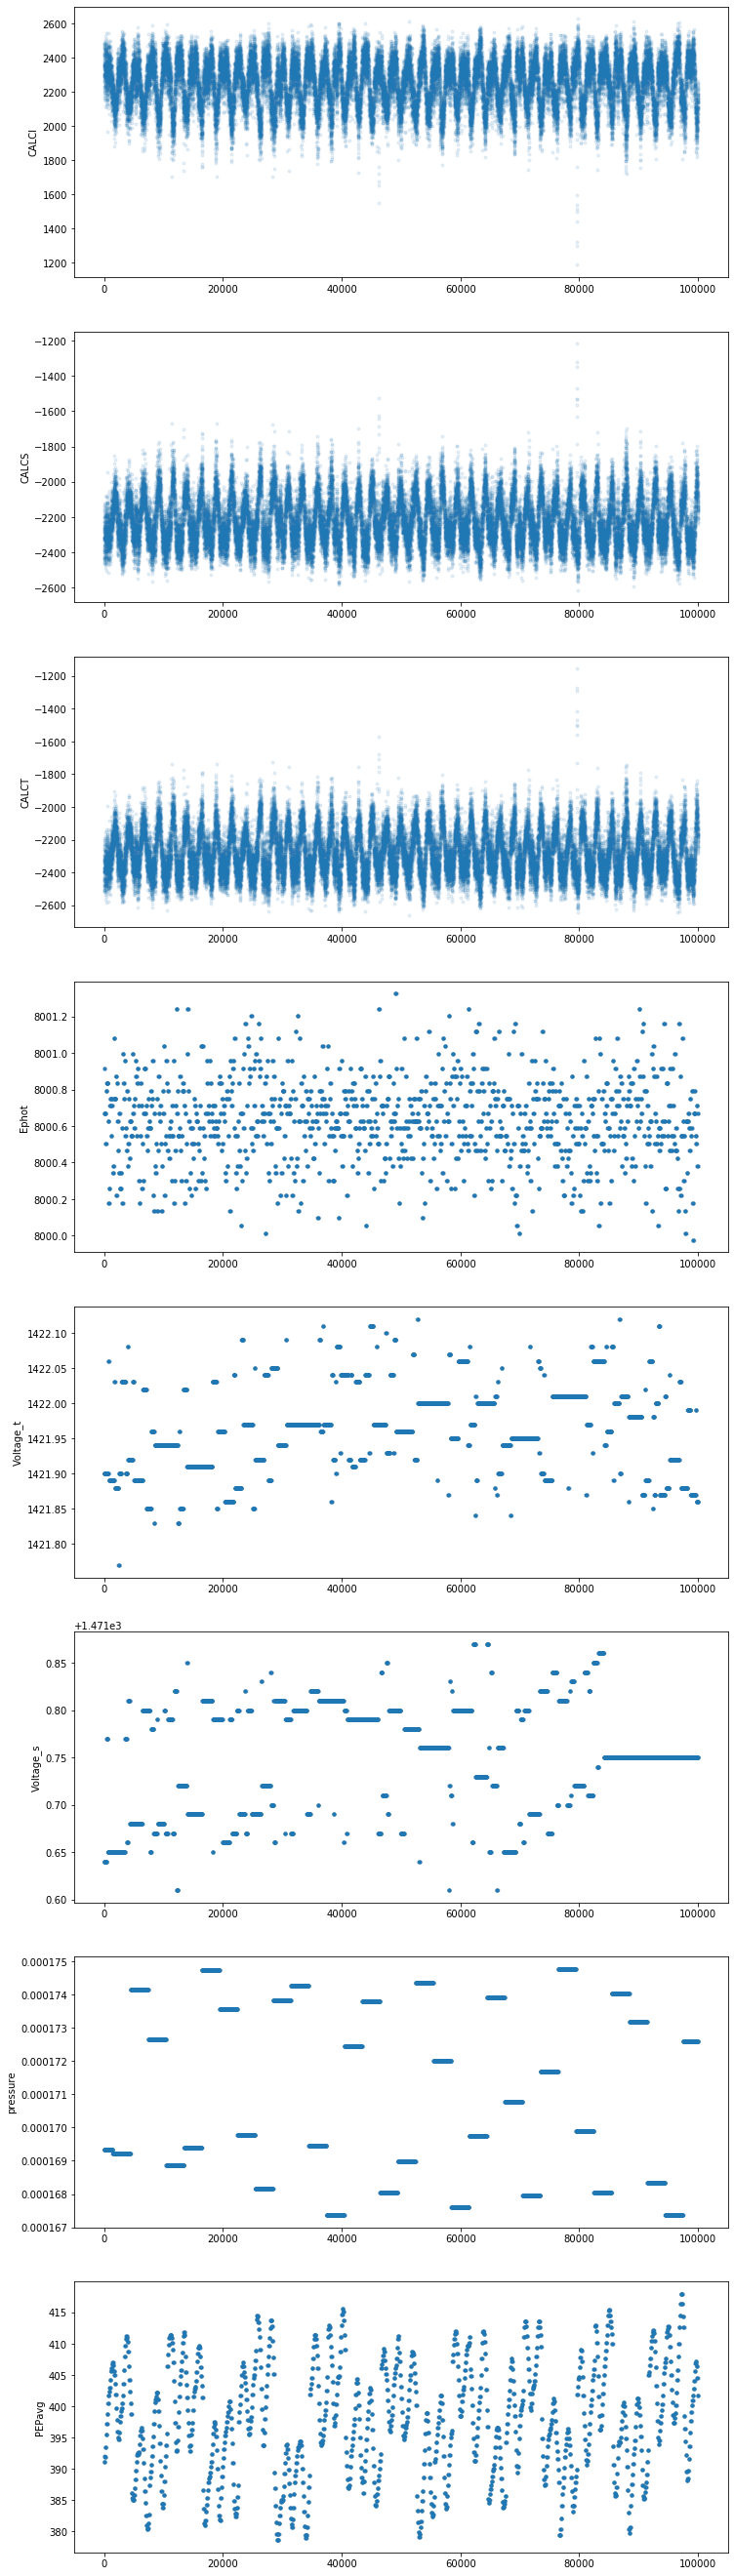

In [32]:
fig = plt.figure(figsize=(12, 6*len(df.columns)))
for idx,col in enumerate(df.columns, start=1):
    ax = fig.add_subplot(len(df.columns),1,idx)    
    ax.plot(df[col], linestyle='', marker='.', alpha=0.05)
    ax.set_ylabel(col)

The missing values for some of the measurements of voltage, etc. must be filled in. Forward fill, backward fill... I think all would be equally correct. I go for simple interpolation assuming equally spaced index

In [33]:
for col in ['Ephot', 'Voltage_s', 'Voltage_t', 'PEPavg','pressure']:
    df[col] = df[col].interpolate(method='linear')

In [34]:
df.isna().count()

CALCI        99702
CALCS        99702
CALCT        99702
Ephot        99702
Voltage_t    99702
Voltage_s    99702
pressure     99702
PEPavg       99702
dtype: int64

In [35]:
#sns.pairplot(df[['CALCT', 'CALCS', 'Ephot','Voltage_s','Voltage_t','PEPavg']])

# Model tests

I use here the models with the parameter fits from the calibration data sheet "swissfell-gas-phys-ansatz"

## Model 1: EM gain model for CALCS

In [36]:
# function factory for these models
def mk_pep_pred_fn1(A, B):
    return lambda calcs, voltage, ebeam: (1/6.241509e12) * ebeam * calcs / (A * np.power(voltage, B))

In [37]:
popt1 = [-8.12506079e-29,  6.54642197e+00]
pep_pred_fn1 = mk_pep_pred_fn1(popt1[0], popt1[1])

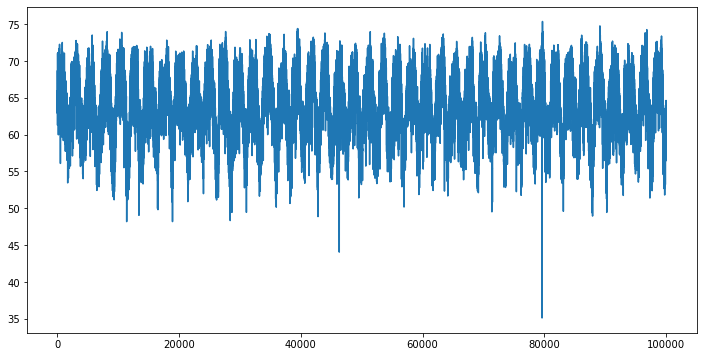

In [38]:
fig,ax = plt.subplots(figsize=(12,6))
ax.plot(pep_pred_fn1(df.CALCS, df.Voltage_s, df.Ephot))

## Model 2: semi-empirical (from CALCS, XeMultVoltage, Ebeam)

In [39]:
# function factory for these models
def mk_pep_pred_fn2(A, B, C):
    return lambda calcs, voltage, ebeam: (1/6.241509e12) * ebeam * calcs / (1 + C * ebeam) / (A * np.power(voltage, B))

In [40]:
popt2 = [-1.11290561e-29,  6.97740548e+00, -7.66814987e-05]
pep_pred_fn2 = mk_pep_pred_fn2(popt2[0], popt2[1], popt2[2])

In [41]:
pep_pred_fn2(df.CALCS, df.Voltage_s, df.Ephot).describe()

count    99701.000000
mean        52.141670
std          3.237350
min         28.602934
25%         49.725805
50%         52.485311
75%         54.626032
max         61.388079
dtype: float64

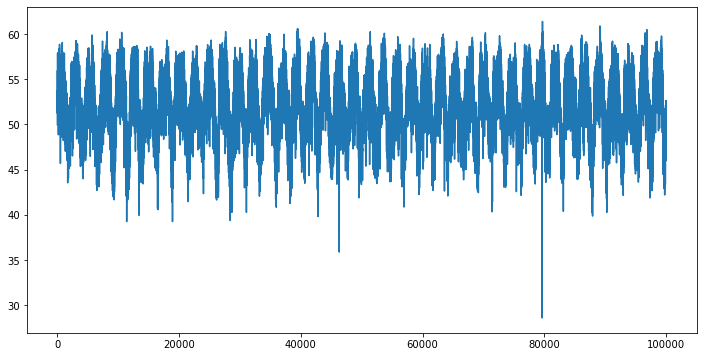

In [42]:
fig,ax = plt.subplots(figsize=(12,6))
ax.plot(pep_pred_fn2(df.CALCS, df.Voltage_s, df.Ephot))

In [43]:
df.head()

CALCI        CALCS        CALCT        Ephot  Voltage_t  Voltage_s  \
0  2373.196750 -2356.301217 -2390.092283          NaN        NaN        NaN   
1  2311.869111 -2285.408087 -2338.330134  8000.914742     1421.9    1471.64   
2  2311.869111 -2285.408087 -2338.330134  8000.914742     1421.9    1471.64   
3  2400.553012 -2367.487931 -2433.618094  8000.914742     1421.9    1471.64   
4  2400.553012 -2367.487931 -2433.618094  8000.914742     1421.9    1471.64   

   pressure      PEPavg  
0       NaN         NaN  
1  0.000169  391.998879  
2  0.000169  391.998879  
3  0.000169  391.998879  
4  0.000169  391.998879

In [44]:
df.describe()

CALCI         CALCS         CALCT         Ephot     Voltage_t  \
count  99702.000000  99702.000000  99702.000000  99701.000000  99701.000000   
mean    2247.991334  -2219.336908  -2276.645760   8000.626354   1421.963873   
std      139.113093    137.766624    140.818162      0.226865      0.060998   
min     1186.657053  -2612.543566  -2659.088429   7999.976115   1421.770000   
25%     2144.033670  -2325.189739  -2385.116015   8000.503320   1421.920000   
50%     2263.320249  -2233.988859  -2292.645454   8000.625928   1421.970000   
75%     2354.923350  -2116.626917  -2171.158907   8000.748537   1422.010000   
max     2627.878956  -1217.230589  -1156.083516   8001.324812   1422.120000   

          Voltage_s      pressure        PEPavg  
count  99701.000000  99701.000000  99701.000000  
mean    1471.751120      0.000171    397.821242  
std        0.056986      0.000003      8.928304  
min     1471.610000      0.000167    378.640406  
25%     1471.700000      0.000169    391.143357  
50%     1471.750000      0.000171    397.790291  
75%     1471.800000      0.000174    404.896668  
max     1471.870000      0.000175    417.950804

In [45]:
df.loc[df.CALCS == df.CALCS.max(), ['CALCS','PEPavg','Voltage_s','Ephot']]

CALCS      PEPavg  Voltage_s        Ephot
79619 -1217.230589  401.886617    1471.72  8000.711754
79620 -1217.230589  401.886617    1471.72  8000.711754

In [46]:
df.loc[df.CALCS == df.CALCS.min(), ['CALCS','PEPavg','Voltage_s','Ephot']]

CALCS      PEPavg  Voltage_s        Ephot
79689 -2612.543566  401.886617    1471.72  8000.589145
79690 -2612.543566  401.886617    1471.72  8000.589145

## Model 3: EM gain model for CALCT

In [47]:
# function factory for these models
def mk_pep_pred_fn3(A, B):
    return lambda calct, voltage, ebeam: (1/6.241509e12) * ebeam * calct / (A * np.power(voltage, B))

In [48]:
popt3 = [-1.64860845e-32,  7.55659496e+00]
pep_pred_fn3 = mk_pep_pred_fn3(popt3[0], popt3[1])

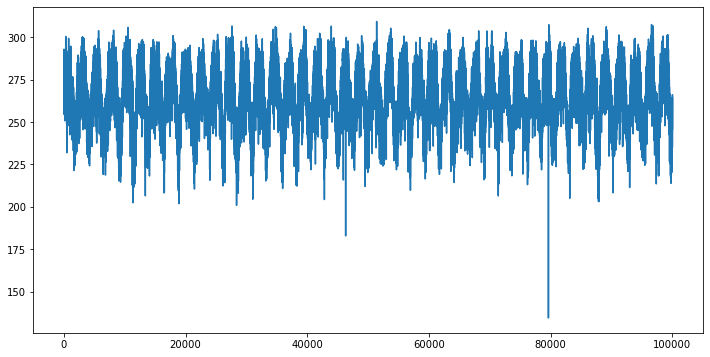

In [49]:
fig,ax = plt.subplots(figsize=(12,6))
ax.plot(pep_pred_fn3(df.CALCT, df.Voltage_t, df.Ephot))

## Model 4: semi-empirical (from CALCT, XeMultVoltage, Ebeam)

In [50]:
# function factory for these models
def mk_pep_pred_fn4(A, B, C):
    return lambda calcs, voltage, ebeam: (1/6.241509e12) * ebeam * calcs / (1 + C * ebeam) / (A * np.power(voltage, B))

In [51]:
popt4 = [-9.75073300e-35,  8.43836707e+00, -8.13896675e-05]

In [52]:
pep_pred_fn4 = mk_pep_pred_fn4(popt4[0], popt4[1], popt4[2])

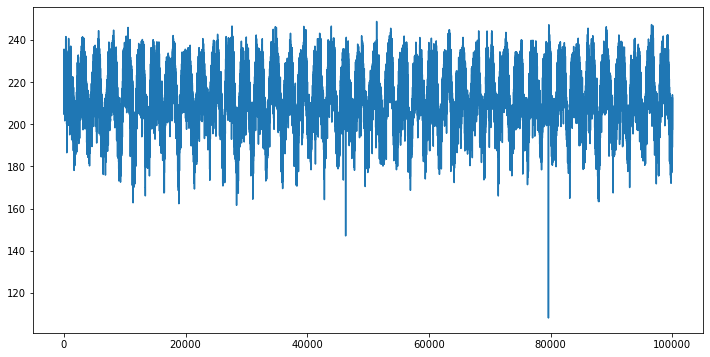

In [53]:
fig,ax = plt.subplots(figsize=(12,6))
ax.plot(pep_pred_fn4(df.CALCT, df.Voltage_t, df.Ephot))